# Explore here

In [38]:
!pip install missingno lazypredict scikit-optimize

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import FunctionTransformer


In [40]:

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


Paso 2: Exploración y limpieza de datos

Descriptivo

In [41]:
df.shape

(1338, 7)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Contamos con 4 variables númericas y 4 variables Categóricas

In [43]:
cont_unique = df.nunique()
cont_unique

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [44]:
df['Sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]
df.head(2)

,age,sex,bmi,children,smoker,region,charges,Sex_n,smoker_n,region_n
0,19,female,27.90,0,yes,southwest,16884.92,0,0,0
1,18,male,33.77,1,no,southeast,1725.55,1,1,1


In [45]:
df.describe()

,age,bmi,children,charges,Sex_n,smoker_n,region_n
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42,0.51,0.80,1.48
std,14.05,6.10,1.21,12110.01,0.50,0.40,1.10
min,18.00,15.96,0.00,1121.87,0.00,0.00,0.00
25%,27.00,26.30,0.00,4740.29,0.00,1.00,1.00
50%,39.00,30.40,1.00,9382.03,1.00,1.00,1.00
75%,51.00,34.69,2.00,16639.91,1.00,1.00,2.00
max,64.00,53.13,5.00,63770.43,1.00,1.00,3.00


In [46]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges,Sex_n,smoker_n,region_n
195,19,male,30.59,0,no,northwest,1639.56,1,1,2
581,19,male,30.59,0,no,northwest,1639.56,1,1,2


In [47]:
df.drop_duplicates(inplace=True)


In [48]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges,Sex_n,smoker_n,region_n


In [49]:
df.describe()

,age,bmi,children,charges,Sex_n,smoker_n,region_n
count,1337.00,1337.00,1337.00,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12,0.50,0.80,1.48
std,14.04,6.10,1.21,12110.36,0.50,0.40,1.11
min,18.00,15.96,0.00,1121.87,0.00,0.00,0.00
25%,27.00,26.29,0.00,4746.34,0.00,1.00,1.00
50%,39.00,30.40,1.00,9386.16,1.00,1.00,1.00
75%,51.00,34.70,2.00,16657.72,1.00,1.00,2.00
max,64.00,53.13,5.00,63770.43,1.00,1.00,3.00


In [50]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
Sex_n       0
smoker_n    0
region_n    0
dtype: int64

Factorizamos

In [51]:
df['Sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]
df.head(2)

,age,sex,bmi,children,smoker,region,charges,Sex_n,smoker_n,region_n
0,19,female,27.90,0,yes,southwest,16884.92,0,0,0
1,18,male,33.77,1,no,southeast,1725.55,1,1,1


In [52]:


df_numerico = df.drop(['sex', 'region', 'smoker'], axis=1)
df_numerico.head(2)

,age,bmi,children,charges,Sex_n,smoker_n,region_n
0,19,27.90,0,16884.92,0,0,0
1,18,33.77,1,1725.55,1,1,1


Escalado de datos

In [53]:
escalador = MinMaxScaler()
df_escalados = escalador.fit_transform(df_numerico)
df_proces = pd.DataFrame(df_escalados, index= df.index, columns= df_numerico.columns)
df_proces.head(2)

,age,bmi,children,charges,Sex_n,smoker_n,region_n
0,0.02,0.32,0.00,0.25,0.00,0.00,0.00
1,0.00,0.48,0.20,0.01,1.00,1.00,0.33


Grafico de variables

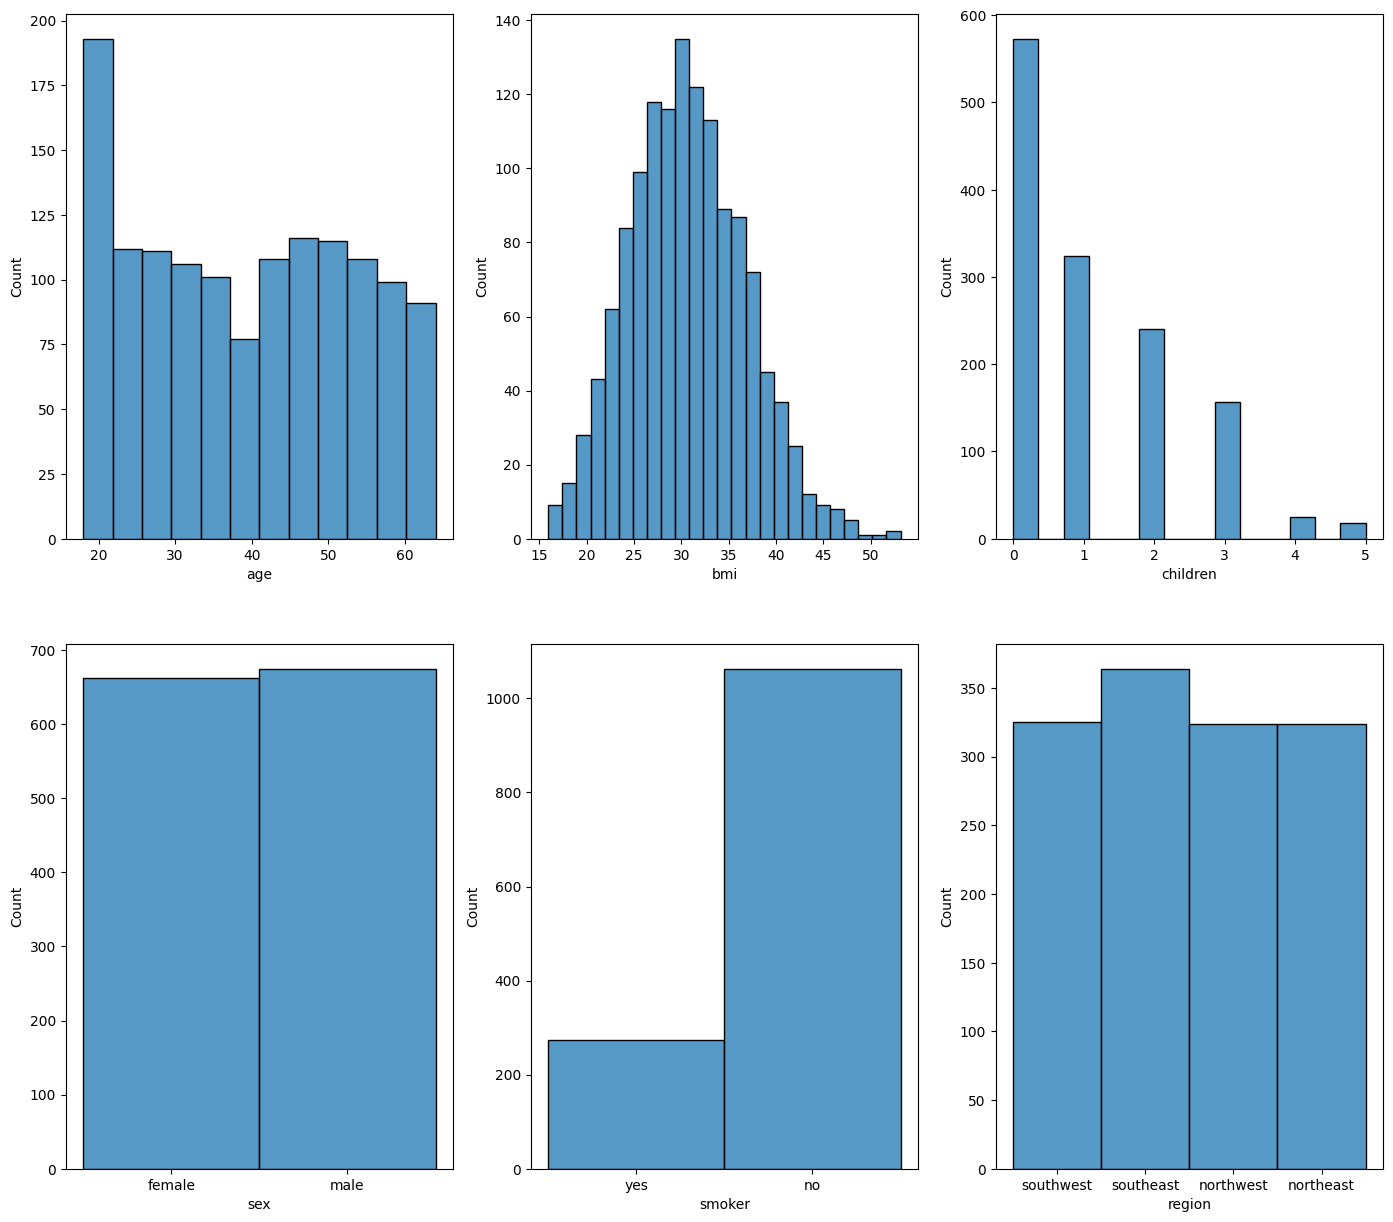

In [54]:
fig, axis = plt.subplots(2,3 , figsize=(17,15))
sns.histplot( ax = axis[0,0], data = df, x= "age")
sns.histplot( ax = axis[0,1], data = df, x= "bmi")
sns.histplot( ax = axis[0,2], data = df, x= "children")
sns.histplot( ax = axis[1,0], data = df, x= "sex")
sns.histplot( ax = axis[1,1], data = df, x= "smoker")
sns.histplot( ax = axis[1,2], data = df, x= "region", log_scale=True)
plt.tight_layout
plt.show()

VALIDAMOS LA CORRELACIÓN

In [55]:
df_corr = df_proces.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,age,bmi,children,charges,Sex_n,smoker_n,region_n
age,1.00,0.11,0.04,0.30,-0.02,0.03,-0.00
bmi,0.11,1.00,0.01,0.20,0.05,-0.00,-0.16
children,0.04,0.01,1.00,0.07,0.02,-0.01,-0.02
charges,0.30,0.20,0.07,1.00,0.06,-0.79,0.01
Sex_n,-0.02,0.05,0.02,0.06,1.00,-0.08,-0.00
smoker_n,0.03,-0.00,-0.01,-0.79,-0.08,1.00,-0.00
region_n,-0.00,-0.16,-0.02,0.01,-0.00,-0.00,1.00


Mediante el estudio de la correlación podemos observar que:
Las variables que tienen mas incidencias son en primer lugar si es fumador, la edad y la masa muscular

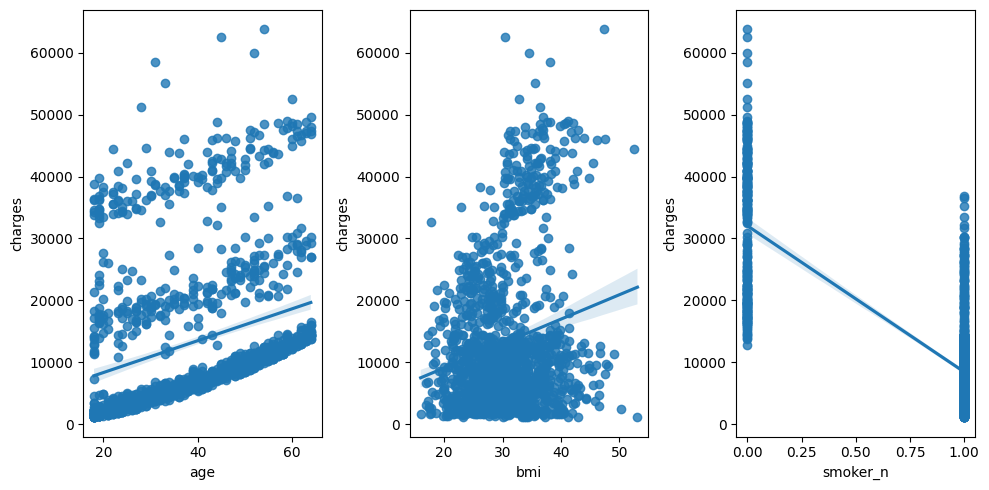

In [56]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = df, x = "age", y = "charges")
sns.regplot(ax = axis[1], data = df, x = "bmi", y = "charges")
sns.regplot(ax = axis[2], data = df, x = "smoker_n", y = "charges")
plt.tight_layout()

plt.show()

Partición

In [57]:
X = df_proces.drop("charges", axis = 1)
y = df_proces["charges"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección del algoritmo

In [59]:
reg = LazyRegressor()
models, predictions = reg.fit(X_train, X_test, y_train, y_test)


  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:02<00:00, 16.48it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 0.190081


In [60]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.90       0.90  0.07        0.18
HistGradientBoostingRegressor                0.89       0.89  0.07        0.26
LGBMRegressor                                0.88       0.89  0.07        0.05
BaggingRegressor                             0.88       0.88  0.07        0.04
NuSVR                                        0.88       0.88  0.07        0.70
RandomForestRegressor                        0.88       0.88  0.08        0.24
XGBRegressor                                 0.87       0.87  0.08        0.06
KNeighborsRegressor                          0.86       0.86  0.08        0.01
MLPRegressor                                 0.86       0.86  0.08        0.19
ExtraTreesRegressor                          0.85       0.85  0.08        0.18
AdaBoostRegressor                            0.83   

Inicialización y entrenamiento del modelo

In [61]:
model = LGBMRegressor(n_estimators=100, learning_rate=0.1)

In [62]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 0.190081


Para calcular la efectividad del modelo utilizaremos el error cuadrático medio (MSE)

In [63]:
rmse= mean_squared_error(y_test,y_pred, squared=False)
print(f'El error cuadratico medio es {rmse}')

El error cuadratico medio es 0.07353899926636953


In [64]:
mae = cross_val_score(model, X,y, scoring='neg_mean_absolute_error',cv=5)
print(np.mean(mae))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 0.192682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 0.194977
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training fro

In [66]:
maes = mean_absolute_error(y_test, y_pred)
print(f"El calculo de valores reales y predichos es de : {maes}")
por = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {por:.2f}%")

El calculo de valores reales y predichos es de : 0.0442623628169618
MAPE: 3.27%


In [67]:
# Convertimos las predicciones así como los valores a la escala original
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

In [68]:
# Calculamos el MAE
mae = mean_absolute_error(y_test_original, y_pred_original)
print(f"MAE: {mae}")

# Calculamos el MAPE
mape = mean_absolute_percentage_error(y_test_original, y_pred_original) * 100  # Multiplicamos por 100 para obtener el porcentaje
print(f"MAPE: {mape:.2f}%")

# Calculamos el R^2
r2 = r2_score(y_test_original, y_pred_original)
print(f"R^2: {r2}")

MAE: 0.058769284507763996
MAPE: 4.31%
R^2: 0.8854546181803851


En promedio, las predicciones del modelo tienen un error absoluto de aproximadamente 0.05877 en comparación con los valores reales.

El MAPE mide la magnitud promedio de los errores absolutos entre las predicciones y los valores reales  un MAPE del 4.31% implica un error promedio realmente bajo.

El coeficiente de determinación es 0.88, esto indica que aproximadamente el 88% de la variabilidad puede explicarse mediante el modelo de regresión, lo cual sugiere un buen ajuste del modelo.

In [71]:
# Obtenemos las mismas métricas sobre el conjunto de ENTRENAMIENTO
y_pred_train = model.predict(X_train)

# Convertimos las predicciones así como los valores a la escala original
y_train_pred_original = np.exp(y_pred_train)
y_train_original = np.exp(y_train)

# Calcular el MAE
mae_train = mean_absolute_error(y_train_original, y_train_pred_original)
print(f"MAE: {mae_train}")

# Calcular el MAPE
mape_train = mean_absolute_percentage_error(y_train_original, y_train_pred_original) * 100  # Multiplicamos por 100 para obtener el porcentaje
print(f"MAPE: {mape_train:.2f}%")

# Calcular el R^2
r2_train = r2_score(y_train_original, y_train_pred_original)
print(f"R^2: {r2_train}")

MAE: 0.03527191752304188
MAPE: 2.71%
R^2: 0.9411196616521327


In [72]:
print(f'Diferencia en el MAE:{mae-mae_train}')
print(f'Diferencia en el MAPE:{mape-mape_train:.2f}%')
print(f'Diferencia en el R^2:{r2-r2_train}')

Diferencia en el MAE:0.023497366984722115
Diferencia en el MAPE:1.59%
Diferencia en el R^2:-0.05566504347174761


Los resultados indican que el modelo no padece de overfitting debido a una diferencia insignificante en las métricas entre los conjuntos de entrenamiento y testeo. La diferencia entre el MAPE en el conjunto de entrenamiento y de testeo es de un 1.59% lo cual no podemos considerarlo un error de generalización porcentual.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"El calculo de valores reales y predichos es de : {mae}")
por = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {por:.2f}%")

El calculo de valores reales y predichos es de : 0.0442623628169618
MAPE: 3.27%
